In [1]:
!pip install tensorflow --quiet
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Your dataset should be unzipped to this path
DATA_DIR = "/content/drive/My Drive/Colab Notebooks/Data"
train_dir = os.path.join(DATA_DIR, 'train')
val_dir = os.path.join(DATA_DIR, 'val')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

num_classes = train_gen.num_classes

Found 10414 images belonging to 14 classes.


In [15]:
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

Found 1301 images belonging to 14 classes.


In [16]:
input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False  # Freeze for speed. Part of transfer learning so that already trained layers are frozen (see CNN transfer learning andrew ng)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_tensor = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<ipython-input-16-82801f17cdb7>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)


In [17]:
EPOCHS = 10
STEPS_PER_EPOCH = 50
VAL_STEPS = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 815s 16s/step - accuracy: 0.3821 - loss: 2.0056 - val_accuracy: 0.7828 - val_loss: 0.6104
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 539s 11s/step - accuracy: 0.7489 - loss: 0.6983 - val_accuracy: 0.8391 - val_loss: 0.3909
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 457s 9s/step - accuracy: 0.8173 - loss: 0.5011 - val_accuracy: 0.8500 - val_loss: 0.3645
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 443s 9s/step - accuracy: 0.8084 - loss: 0.4738 - val_accuracy: 0.8578 - val_loss: 0.3236
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 380s 8s/step - accuracy: 0.8548 - loss: 0.4083 - val_accuracy: 0.8750 - val_loss: 0.3110
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 324s 7s/step - accuracy: 0.8510 - loss: 0.3942 - val_accuracy: 0.8953 - val_loss: 0.2508
Epoch 7/10
26/50 ━━━━━━━━━━━━━━━━━━━━ 1:35 4s/step - accuracy: 0.8562 - loss: 0.3570

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8549 - loss: 0.3678 - val_accuracy: 0.9031 - val_loss: 0.2507
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - accuracy: 0.8452 - loss: 0.3829 - val_accuracy: 0.9094 - val_loss: 0.2233
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.8608 - loss: 0.3609 - val_accuracy: 0.9094 - val_loss: 0.2404
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.8788 - loss: 0.2902 - val_accuracy: 0.9234 - val_loss: 0.2071


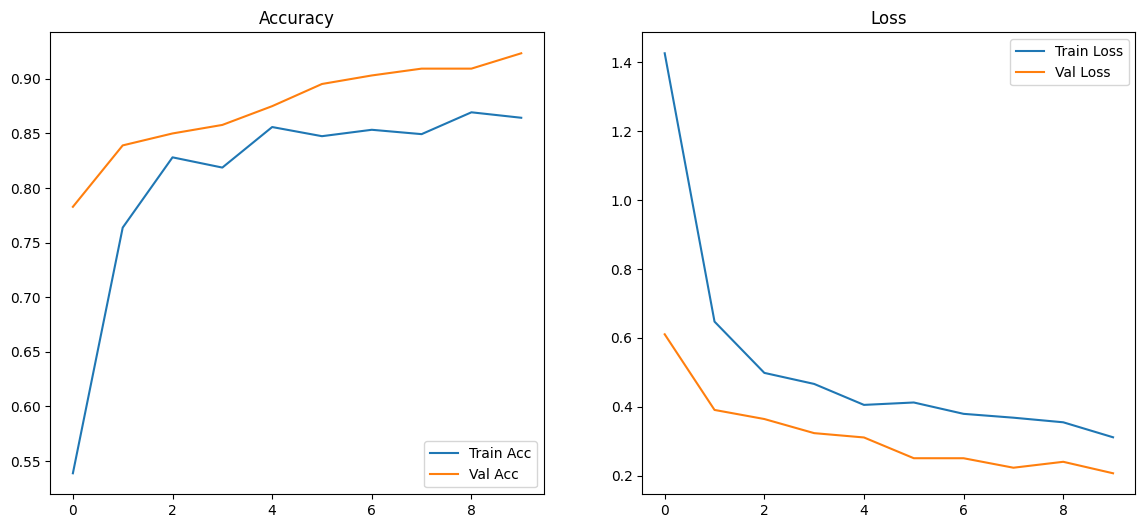

                             precision    recall  f1-score   support

         Corn___Common_Rust       0.96      0.99      0.98       119
      Corn___Gray_Leaf_Spot       0.80      0.63      0.70        51
             Corn___Healthy       0.98      0.99      0.99       116
Corn___Northern_Leaf_Blight       0.82      0.91      0.86        98
      Potato___Early_Blight       0.96      0.97      0.97       100
           Potato___Healthy       0.93      0.93      0.93        15
       Potato___Late_Blight       0.96      0.95      0.95       100
          Rice___Brown_Spot       0.72      0.54      0.62        61
             Rice___Healthy       0.81      0.76      0.78       149
          Rice___Leaf_Blast       0.59      0.72      0.65        98
          Rice___Neck_Blast       0.99      1.00      1.00       100
         Wheat___Brown_Rust       0.90      0.89      0.89        90
            Wheat___Healthy       0.95      0.99      0.97       112
        Wheat___Yellow_Rust      

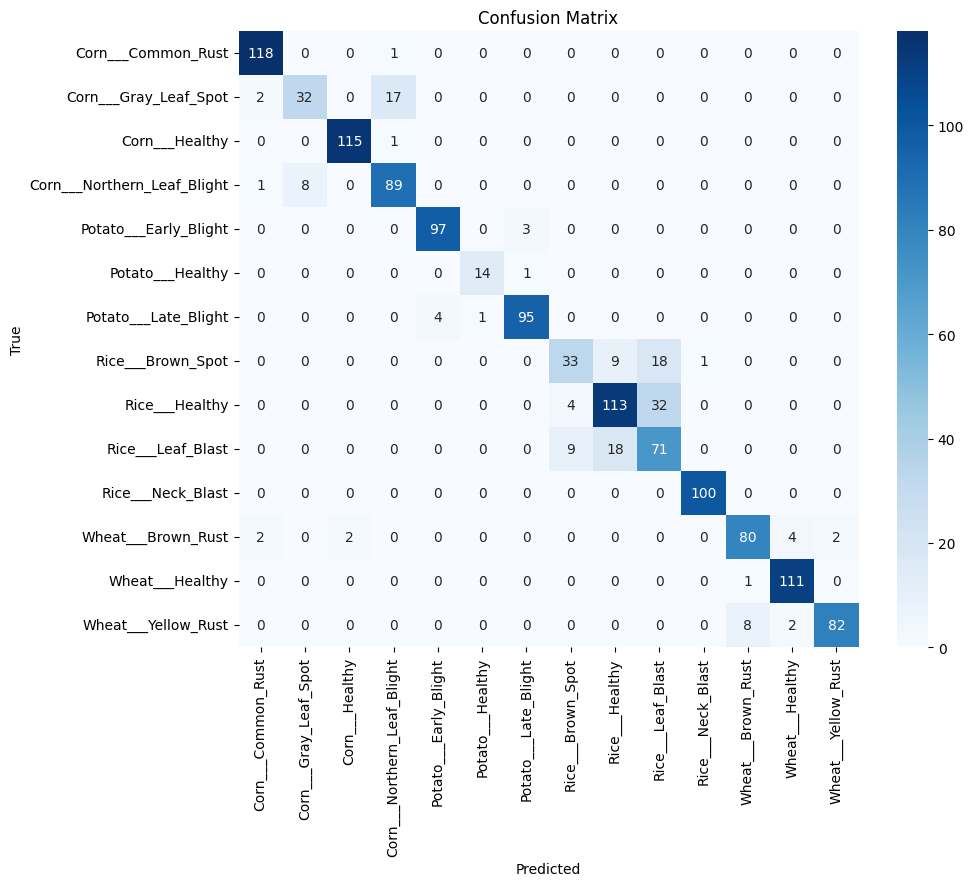

In [18]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

plot_training_history(history)

# -----------------------------
# 📈 Confusion Matrix & Report
# -----------------------------
y_pred = model.predict(val_gen, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [19]:
model.save('smartLeaf_mobilenetV2.keras')

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,311,788 (8.82 MB)

 Trainable params: 17,934 (70.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 35,870 (140.12 KB)

In [28]:
model.save('smartLeaf_mobilenetV2.h5')

----------
----------
----------
#Notes:

```
input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False  # Freeze for speed. Part of transfer learning so that already trained layers are frozen (see CNN transfer learning andrew ng)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_tensor = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 10
STEPS_PER_EPOCH = 50
VAL_STEPS = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS
)
```

##Explaination
## **What is Happening in the Code?**

- **Transfer Learning** means to use a model (like MobileNetV2) that was already trained on a big dataset (ImageNet) and use it for your own task (like classifying cats vs dogs), instead of training from scratch.
- **Freezing layers** (`base_model.trainable = False`) means to not change the weights of the MobileNetV2 layers during training-this saves time and works well if your new dataset is small.
- You **add your own layers** on top (like `GlobalAveragePooling2D`, `Dropout`, and a `Dense` layer for your classes).
- You **compile** and **train** the model on your own data.

---

## **Step-by-Step**

### 1. **Input Layer**

```python
input_tensor = Input(shape=(224, 224, 3))
```

- This says your images are 224x224 pixels with 3 color channels (RGB).


### 2. **Load Pretrained MobileNetV2**

```python
base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)
base_model.trainable = False  # Freeze layers
```

- Loads MobileNetV2 **without the top (final) layer** so you can add your own.
- Uses weights trained on ImageNet (a huge dataset).
- Freezes all layers so they don't update during training.


### 3. **Add Custom Layers**

```python
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output_tensor = Dense(num_classes, activation='softmax')(x)
```

- **GlobalAveragePooling2D**: Makes the output smaller and easier to handle.
- **Dropout**: Helps prevent overfitting.
- **Dense**: Final layer with as many outputs as your classes (e.g., 2 for cat/dog), using softmax for probabilities.


### 4. **Build and Compile Model**

```python
model = Model(inputs=input_tensor, outputs=output_tensor)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

- Puts everything together.
- Uses Adam optimizer and a loss function suitable for classification.


### 5. **Train the Model**

```python
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS
)
```

- Trains only the new layers you added, not the MobileNetV2 layers.

---

## **Why Use Transfer Learning?**

- **Faster training**: You only train a few layers, not the whole model.
- **Better results**: The model already knows how to detect general features (edges, shapes, etc.), so it learns your new task faster and with less data.
- **Less data needed**: You don’t need millions of images.

---

## **Comparison: Training From Scratch vs Transfer Learning**

| Feature | Training From Scratch | Transfer Learning (Your Code) |
| :-- | :-- | :-- |
| Data Needed | A LOT (thousands+) | Less (hundreds can work) |
| Training Time | Long | Shorter |
| Uses Pretrained Features? | No | Yes (from ImageNet) |
| Good for Small Datasets? | No | Yes |
| Freezes Old Layers? | No | Yes (unless you unfreeze later) |


---

## **Requirements**

To run this code on a MacBook (Apple Silicon, M1/M2/M3), use **miniforge/mamba** for package management:

```bash
mamba install tensorflow keras numpy
```


---

## **Tips**

- **Always preprocess your images** using the correct function for MobileNetV2:

```python
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# Use preprocess_input on your images before feeding to the model
```

- If you want to **fine-tune** (train some of the base_model layers), set `base_model.trainable = True` and unfreeze a few top layers after initial training.

---

## **Visual Diagram**

```
[Input Image] → [Preprocessing] → [MobileNetV2 (frozen)] → [GlobalAveragePooling2D] → [Dropout] → [Dense (your classes)] → [Prediction]
```


---